In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import model_common
import xrd
import helpers as h
from importlib import reload
reload(model_common)
reload(xrd)
reload(h)

# MODEL_CHECKPOINT = 'checkpoints/dataset_10000_dl100_7d_v3.pt'
MODEL_CHECKPOINT = 'checkpoints/dataset_100000_dl100_7d_v3.pt'

# true_params = [0.028500, 0.023000, 4.000e-05, 1.050e-05, 0.006000, 2.000e-05, -5.000e-06]
# true_params = [0.028500, 0.023000, 4.000e-05, 1.050e-05, 0.006000, 2.000e-05, -5.000e-06]
# from experiment file
true_params = [0.008094, 0.000943, 5200e-8, 3500e-8, 0.00255, 3000e-8, -50e-8]


🎨 Generating full curves for visualization...
Монокристал GGG буде використаний для симуляції.


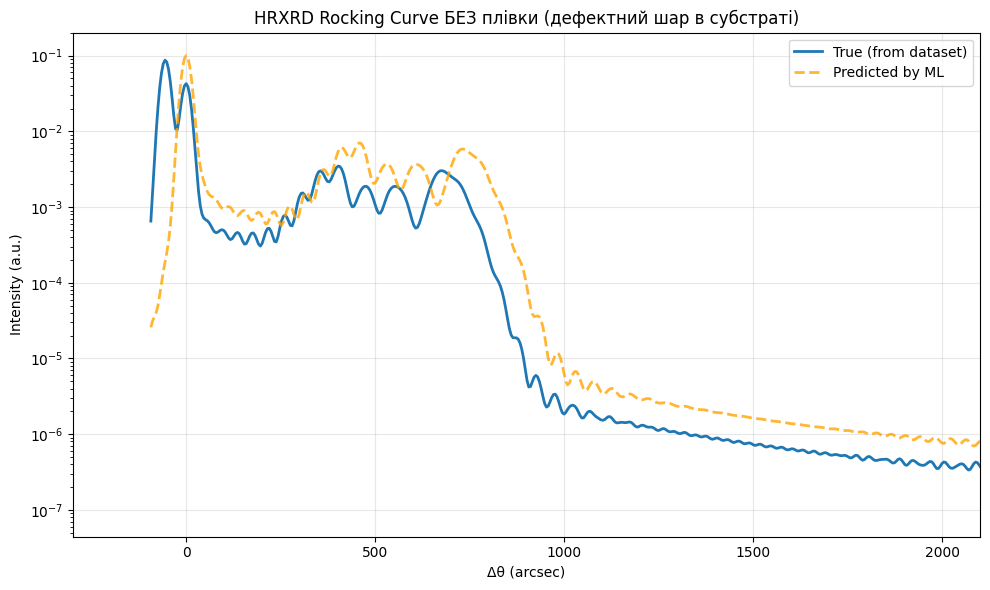

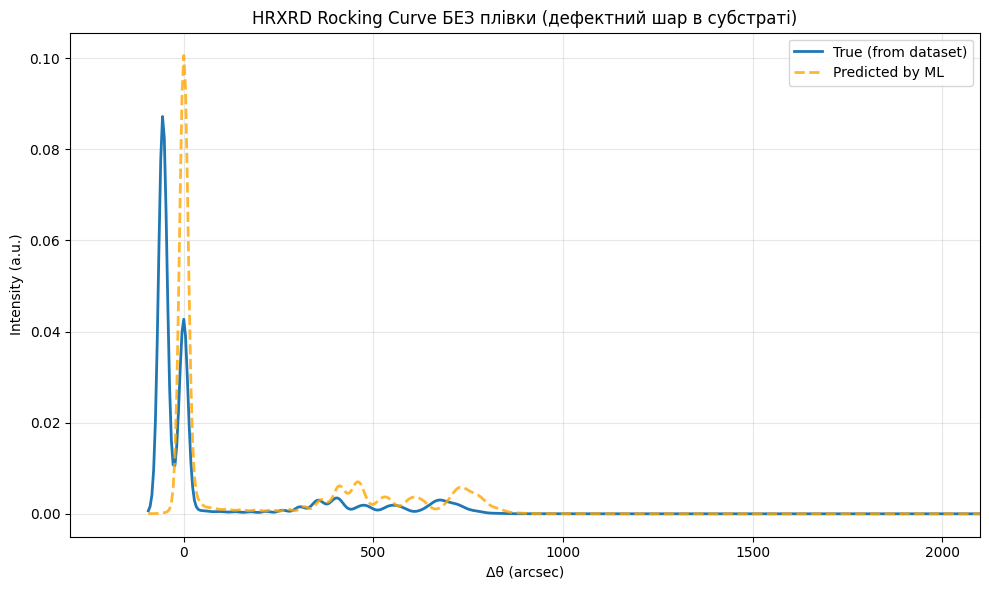


✅ Visualization complete!


In [ ]:
# ============================================================================
# ГЕНЕРУВАТИ ПОВНІ КРИВІ ДЛЯ ВІЗУАЛІЗАЦІЇ
# ============================================================================
print("\n🎨 Generating full curves for visualization...")

# True curve (з параметрів з датасету)
true_curve, true_profile = xrd.compute_curve_and_profile(
    array=true_params,
    dl=100e-8
)

# Predicted curve (з predicted параметрів)
predicted_curve, predicted_profile = xrd.compute_curve_and_profile(
    array=true_params,
    dl=100e-8,
    bicrystal=False
)

# ============================================================================
# ВІЗУАЛІЗАЦІЯ
# ============================================================================
# fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Rocking Curve
# axes.set_title("Rocking Curve Comparison", fontsize=12, fontweight='bold')
# axes.semilogy(true_curve.X_DeltaTeta, true_curve.Y_R_vseZ, 
#              label="True (from dataset)", color='C0', linestyle='-', linewidth=2)
# axes.semilogy(predicted_curve.X_DeltaTeta, predicted_curve.Y_R_vseZ, 
#              label="Predicted by ML", color='orange', linestyle='--', linewidth=2, alpha=0.8)
# axes.set_xlabel("Δθ (arcsec)")
# axes.set_ylabel("Intensity")
# # axes[0].set_ylim(0, 0.005)
# # axes[0].set_xlim(-100, 3000)
# axes.grid(True, alpha=0.3)
# axes.legend()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(true_curve.X_DeltaTeta, true_curve.Y_R_vseZ, 
             label="True (from dataset)", color='C0', linestyle='-', linewidth=2)
ax.plot(predicted_curve.X_DeltaTeta, predicted_curve.Y_R_vseZ, 
             label="Predicted by ML", color='orange', linestyle='--', linewidth=2, alpha=0.8)
ax.set_xlabel('Δθ (arcsec)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('HRXRD Rocking Curve БЕЗ плівки (дефектний шар в субстраті)')
ax.set_yscale('log')
ax.set_xlim(-300, 2100)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

ax1.plot(true_curve.X_DeltaTeta, true_curve.Y_R_vseZ, 
             label="True (from dataset)", color='C0', linestyle='-', linewidth=2)
ax1.plot(predicted_curve.X_DeltaTeta, predicted_curve.Y_R_vseZ, 
             label="Predicted by ML", color='orange', linestyle='--', linewidth=2, alpha=0.8)
ax1.set_xlabel('Δθ (arcsec)')
ax1.set_ylabel('Intensity (a.u.)')
ax1.set_title('HRXRD Rocking Curve БЕЗ плівки (дефектний шар в субстраті)')
# ax1.set_yscale('log')
ax1.set_xlim(-300, 2100)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Deformation Profile
# axes[1].set_title("Deformation Profile Comparison", fontsize=12, fontweight='bold')
# axes[1].plot(true_profile.X, true_profile.total_Y, 
#              label="True (from dataset)", color='C0', linestyle='-', linewidth=2)
# axes[1].plot(predicted_profile.X, predicted_profile.total_Y, 
#              label="Predicted by ML", color='orange', linestyle='--', linewidth=2, alpha=0.8)
# axes[1].set_xlabel("Depth (cm)")
# axes[1].set_ylabel("Deformation")
# axes[1].grid(True, alpha=0.3)
# axes[1].legend()

plt.tight_layout()
plt.show()

print("\n✅ Visualization complete!")